In [394]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import funcs
from statsmodels.formula.api import ols
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm


%matplotlib inline

In [3]:
md = pd.read_csv('Masters_StatsT25.csv')

In [4]:
md.isnull().sum()

Player                      0
Year                        0
Masters_Top_25              0
Driving_Rank                0
Top_10's                    0
Percent_BreakPar_Ranklog    0
Avg_Score_Ranklog           0
Money_Ranklog               0
Average_Drive_Distance      0
Percent_Fairway_Hit         0
Percent_Greens_Hit          0
Percent_Par3_Bird           0
Percent_Par4_Bird           0
Percent_Par5_Bird           0
Avg_scoreB4cut              0
dtype: int64

In [284]:
md.head()

,Player,Year,Masters_Top_25,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
0,Fuzzy Zoeller,1980,1.0,-1.557936,1.645844,-0.186929,-0.006273,-0.147066,-0.380798,-0.284456,-1.083591,-0.322482,-1.276666,0.040460,0.456467
1,J.C. Snead,1980,1.0,-1.519314,-0.440755,0.954553,-0.262595,0.174396,-0.411081,-0.886184,-0.962889,-2.193174,-1.313608,-1.709933,0.110460
2,Jack Nicklaus,1980,0.0,-1.480691,-0.440755,-0.361907,-1.215239,-0.241844,-0.471647,0.815933,1.020815,0.135241,0.352141,-2.122021,0.369965
3,Andy Bean,1980,1.0,-1.442069,0.950311,-3.107519,-1.555566,-1.672780,-0.495874,0.256644,-0.152089,0.692468,0.335349,0.330884,-0.261496
4,John Fought,1980,0.0,-1.403446,-0.440755,0.042231,0.780302,0.689139,-0.580666,-0.678535,-1.185924,-0.544236,-1.031505,-0.486751,1.537736


In [9]:
md.rename(columns ={'Driving_Rank':'S1',"Top_10's":'S2','Percent_BreakPar_Ranklog':'S3','Avg_Score_Ranklog':'S4','Money_Ranklog':'S5','Average_Drive_Distance':'S6','Percent_Fairway_Hit':'S7','Percent_Greens_Hit':'S8','Percent_Par3_Bird':'S9','Percent_Par4_Bird':'S10','Percent_Par5_Bird':'S11','Avg_scoreB4cut':'S12'}, inplace = True)

In [154]:
abs(md.corr()) > .7

,Year,Masters_Top_25,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Year,True,False,False,False,False,False,False,True,False,False,False,False,False,False
Masters_Top_25,False,True,False,False,False,False,False,False,False,False,False,False,False,False
S1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
S2,False,False,False,True,False,True,True,False,False,False,False,False,False,False
S3,False,False,False,False,True,True,False,False,False,False,False,False,False,False
S4,False,False,False,True,True,True,True,False,False,False,False,False,False,False
S5,False,False,False,True,False,True,True,False,False,False,False,False,False,False
S6,True,False,False,False,False,False,False,True,False,False,False,False,False,False
S7,False,False,False,False,False,False,False,False,True,False,False,False,False,False
S8,False,False,False,False,False,False,False,False,False,True,False,False,False,False


[Text(0.5, 0, 'Masters_Top_25'),
 Text(1.5, 0, 'S1'),
 Text(2.5, 0, 'S2'),
 Text(3.5, 0, 'S3'),
 Text(4.5, 0, 'S4'),
 Text(5.5, 0, 'S5'),
 Text(6.5, 0, 'S6'),
 Text(7.5, 0, 'S7'),
 Text(8.5, 0, 'S8'),
 Text(9.5, 0, 'S9'),
 Text(10.5, 0, 'S10'),
 Text(11.5, 0, 'S11'),
 Text(12.5, 0, 'S12')]

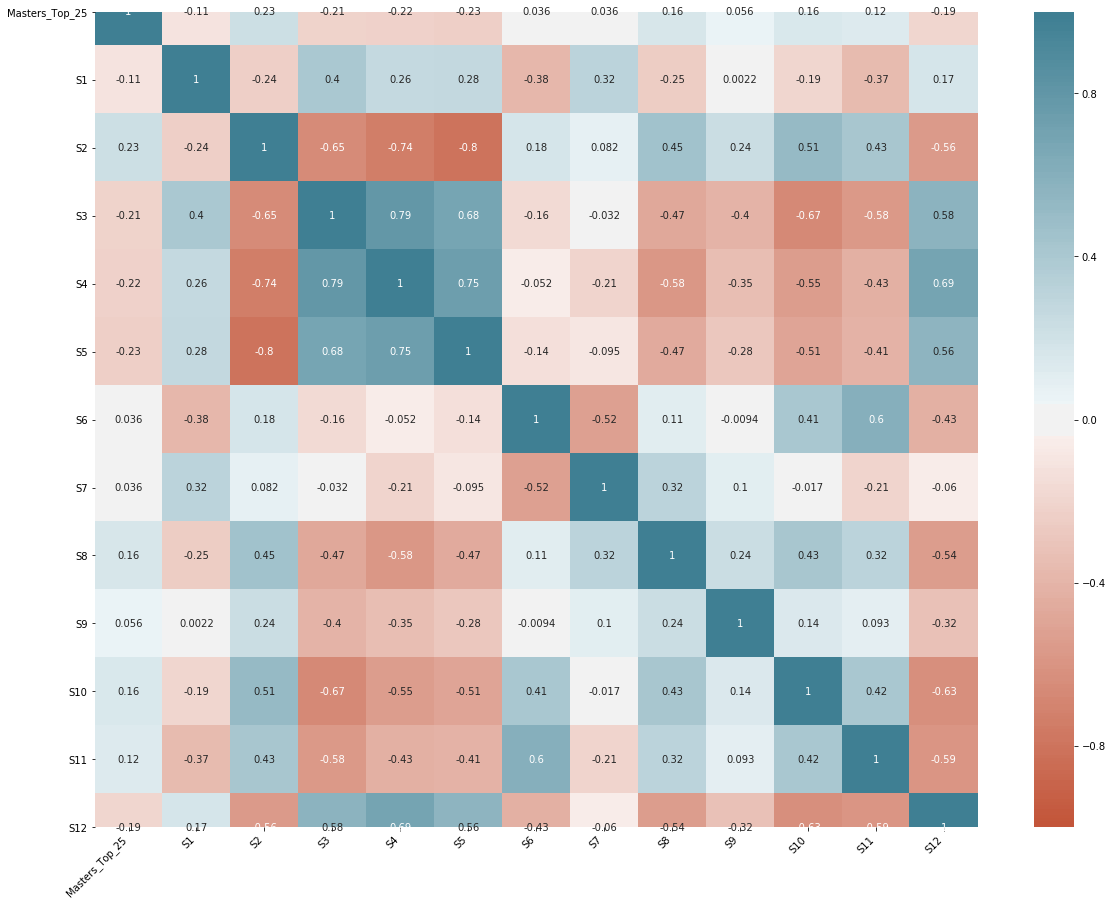

In [231]:
md2 = md.drop(['Year','Player'], axis = 1)
corr = md2.corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

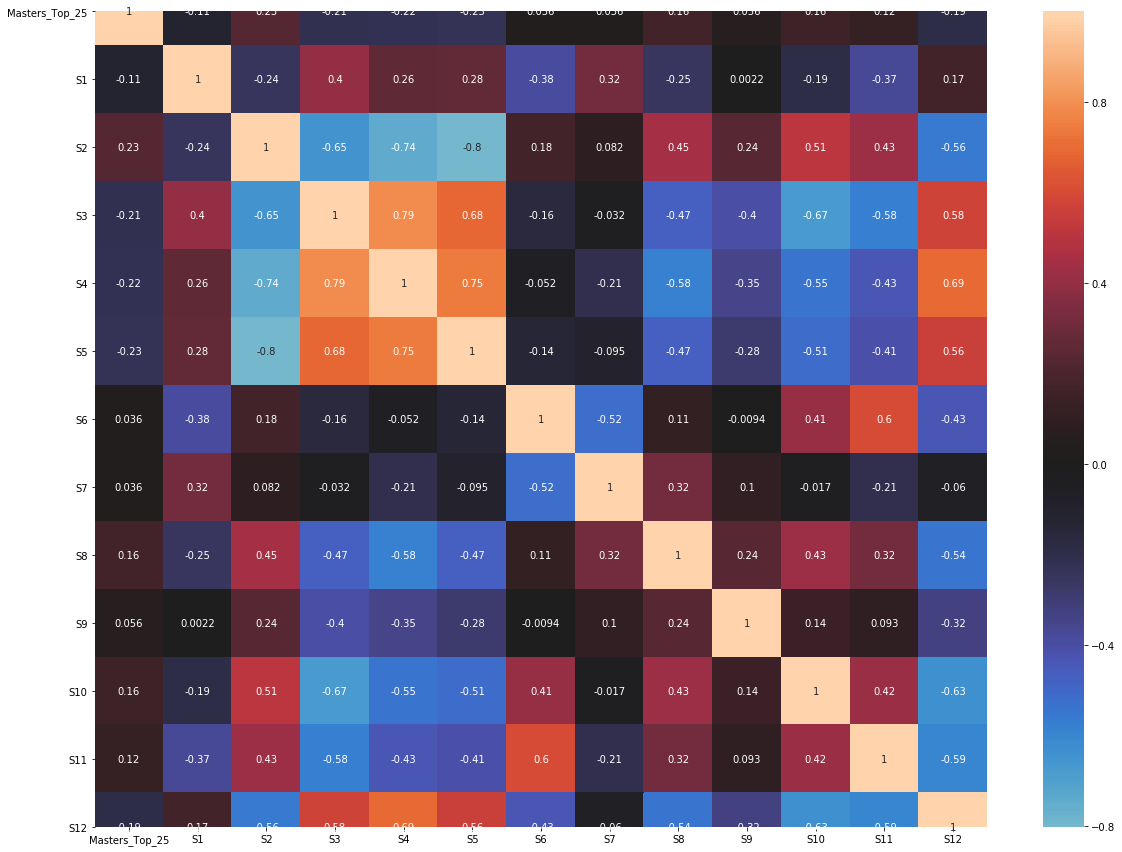

In [204]:
plt.figure(figsize=(20,15))
sns.heatmap(md.drop(['Year','Player'], axis = 1).corr(), annot=True, center = 0)

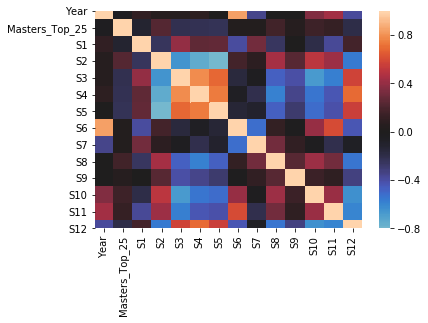

In [177]:
sns.heatmap(md.corr(), center=0);

md.head9)

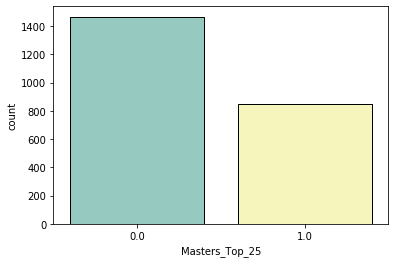

In [118]:
sns.countplot(md['Masters_Top_25'], data=md, palette="Set3", edgecolor='black')

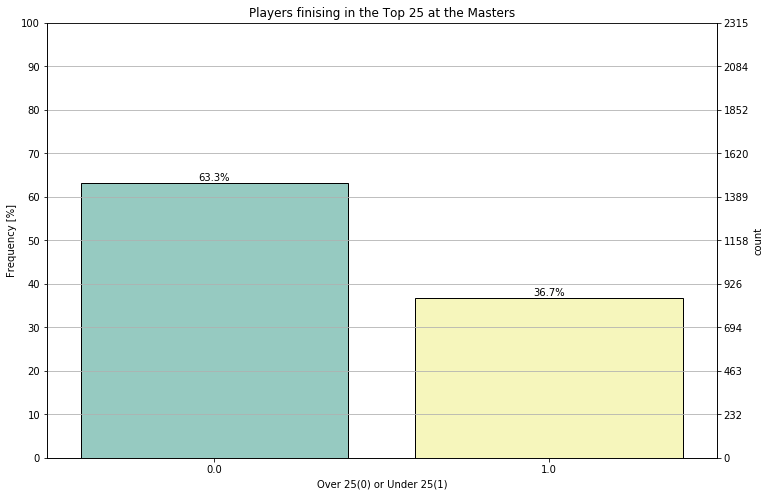

In [176]:
plt.figure(figsize=(12,8))
ax = sns.countplot(md['Masters_Top_25'], data=md, palette="Set3", edgecolor='black')
plt.title('Players finising in the Top 25 at the Masters')
plt.xlabel('Over 25(0) or Under 25(1)')
ncount = len(md)
ax2=ax.twinx()

ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

ax.yaxis.set_major_locator(ticker.LinearLocator(11))

ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax2.grid(None)

plt.savefig('Top25vsNotTop25.pdf')

In [107]:
md.shape

(2315, 15)

### X and Y Data

In [134]:
X = md[['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12']]

In [135]:
y = md['Masters_Top_25']

### Change

In [61]:
X = md[['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12']]

# Logistic Regression

### TrainTestSplit

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [70]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict

In [232]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [233]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    1057
1.0     679
Name: Masters_Top_25, dtype: int64
0.0    0.608871
1.0    0.391129
Name: Masters_Top_25, dtype: float64


In [234]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    346
1.0    233
Name: Masters_Top_25, dtype: int64
0.0    0.597582
1.0    0.402418
Name: Masters_Top_25, dtype: float64


# Classification Evaluation

In [375]:
# Create matrix of features
X = md.drop(['Year', 'Player','Masters_Top_25'], axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = md['Masters_Top_25'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [377]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [378]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [379]:
dictionary

{'S1': -0.11127373590927851,
 'S2': 0.16661844124807745,
 'S3': -0.2927142303707747,
 'S4': 0.0699133495373133,
 'S5': -0.058146966374885665,
 'S6': -0.03605521023718523,
 'S7': 0.051531583130510226,
 'S8': 0.06917918648941435,
 'S9': -0.10575594647571536,
 'S10': -0.10516698440989346,
 'S11': -0.13863982357725743,
 'S12': -0.28390464293399764}

In [380]:
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [381]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.690846286701209


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [382]:
y_test.value_counts()

0.0    383
1.0    196
Name: Masters_Top_25, dtype: int64

In [383]:
y_test.mean()

0.3385146804835924

In [384]:
1 - y_test.mean()

0.6614853195164077

In [385]:
max(y_test.mean(), 1 - y_test.mean())

0.6614853195164077

In [387]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[350  33]
 [146  50]]


In [395]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['NotTop25', 'Top25']

In [419]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[350  33]
 [146  50]]


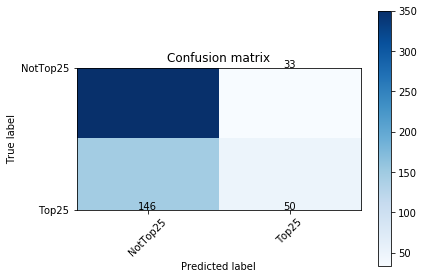

In [420]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [398]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0.]
Pred: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0.]


In [399]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [423]:
FP

33

##### "Out of all the predictions our model made, what percentage were correct?"

In [400]:
print((TP + TN) / float(TP + TN + FP + FN))

0.690846286701209


In [401]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.690846286701209


##### Out of the players that I predicted to be in top25 60% were

In [403]:
metrics.precision_score(y_test, y_pred_class)

0.6024096385542169

#### Out of the players that were in the top 25 I predicted 25% of them

In [406]:
metrics.recall_score(y_test, y_pred_class)

0.25510204081632654

In [409]:
(TN / float(TN + FP))

0.9138381201044387

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

###### Predict That a player IS in the top25 and they were NOT

In [412]:
(FP / float(TN + FP))

0.08616187989556136

**False Negative Rate:** When the actual value is positive, how often is the prediction incorrect?

##### Predicted that they would NOT be in the top25 and they WERE

In [429]:
(FN / float(FN + TP))

0.7448979591836735

## F1 Score

In [414]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred_class)*metrics.recall_score(y_test, y_pred_class))/(metrics.precision_score(y_test, y_pred_class)+metrics.recall_score(y_test, y_pred_class))

0.35842293906810035

## Adjusting the classification threshold

In [430]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.690846
recall,0.255102
precision,0.602410
F1,0.358423


In [431]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.663212
recall,0.005102
precision,1.000000
F1,0.010152


In [432]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [433]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.66803217, 0.33196783],
       [0.68057338, 0.31942662],
       [0.67382687, 0.32617313],
       [0.40239456, 0.59760544],
       [0.58674563, 0.41325437],
       [0.59431887, 0.40568113],
       [0.77985164, 0.22014836],
       [0.71006777, 0.28993223],
       [0.75855715, 0.24144285],
       [0.50342433, 0.49657567]])

In [434]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.33196783, 0.31942662, 0.32617313, 0.59760544, 0.41325437,
       0.40568113, 0.22014836, 0.28993223, 0.24144285, 0.49657567])

In [435]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

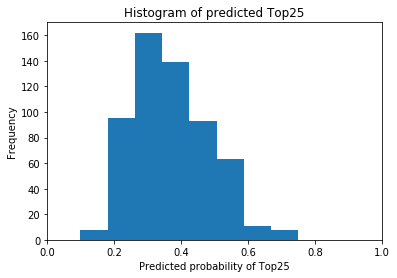

In [437]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted Top25')
plt.xlabel('Predicted probability of Top25')
plt.ylabel('Frequency')

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [440]:
# predict Top25 if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [439]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.33196783, 0.31942662, 0.32617313, 0.59760544, 0.41325437,
       0.40568113, 0.22014836, 0.28993223, 0.24144285, 0.49657567])

In [441]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 1.])

In [442]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[350  33]
 [146  50]]


In [443]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[145 238]
 [ 32 164]]


## ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

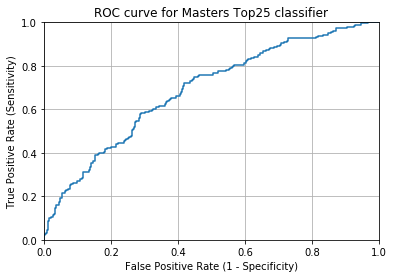

In [445]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Masters Top25 classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [446]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [447]:
evaluate_threshold(0.5)

Sensitivity: 0.25510204081632654
Specificity: 0.9138381201044387


In [448]:
evaluate_threshold(0.3)

Sensitivity: 0.8367346938775511
Specificity: 0.381201044386423


In [453]:
# calculate cross-validated AUC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

0.6386271220817094

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

- AUC is **scale-invariant**. It measures how well predictions are ranked, rather than their absolute values.
- AUC is **classification-threshold-invariant**. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.





In [454]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.687829701071029


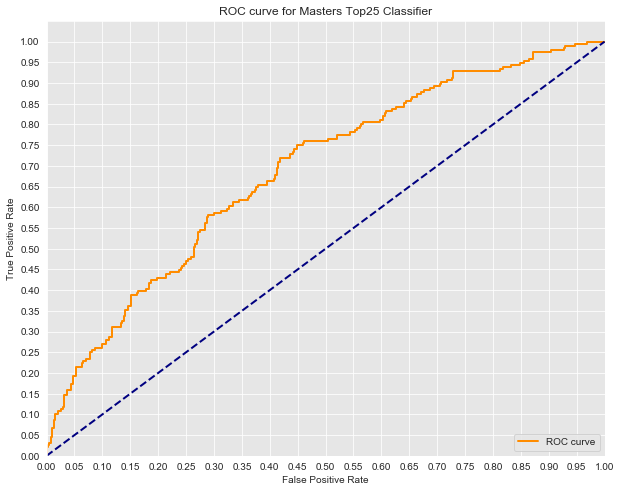

In [458]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Masters Top25 Classifier')
plt.legend(loc='lower right')
plt.show()